## 180815 processing of AeA wellGel experiment NO cover

35 day old ae aegypti. Approximately 30 females (possibly 2-3 males). 

NO cover. An acrylic frame with a hole of 112 x 70 mm was placed on the mesh of the cage to prevent contact of the plate (gel) and mesh, and mosquito feet and plate. 2mm thick acrylic (should check).  

384 well, 1% low melt agar in water (no additives) (7-18C gelling), aluminum heating block heated to 43C, column 1 was covered during experiment for controls.

In [1]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from scipy.optimize import curve_fit
from scipy import interpolate
from skimage.draw import circle
from matplotlib.patches import Circle
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import pims
%matplotlib inline
def fitFunc(x, a, b):
    return a*x + b



In [2]:
D = '180815_Env_mtAeAHEX01.xls'
d = pd.read_excel(D, sheetname='Amplification Data', header=7)
s = pd.read_excel(D, sheetname='Sample Setup', header=7)
cycles = np.arange(1,d.Cycle.max()+1,1)

In [3]:
d.head()

,Well,Cycle,Target Name,Rn,ΔRn
0,A1,1,Target 1,-0.010413,-0.006203
1,A1,2,Target 1,-0.009306,-0.005246
2,A1,3,Target 1,-0.007167,-0.003256
3,A1,4,Target 1,-0.005771,-0.002010
4,A1,5,Target 1,-0.004080,-0.000469


In [4]:
NTCsT1 = s["Well"][(s["Task"] == 'UNKNOWN')   & (s["Target Name"] == 'Target 1')]
NTCsT1

0     A1
1     A2
2     A3
3     A4
4     A5
5     A6
6     A7
7     A8
8     A9
24    C1
25    C2
26    C3
27    C4
28    C5
29    C6
30    C7
48    E1
49    E2
Name: Well, dtype: object

th T1 = 0.0
A1
A2
A3
A4
A5
A6
A7
A8
A9
C1
C2
C3
C4
C5
C6
C7
E1
E2
9  positive wells
9  negative wells


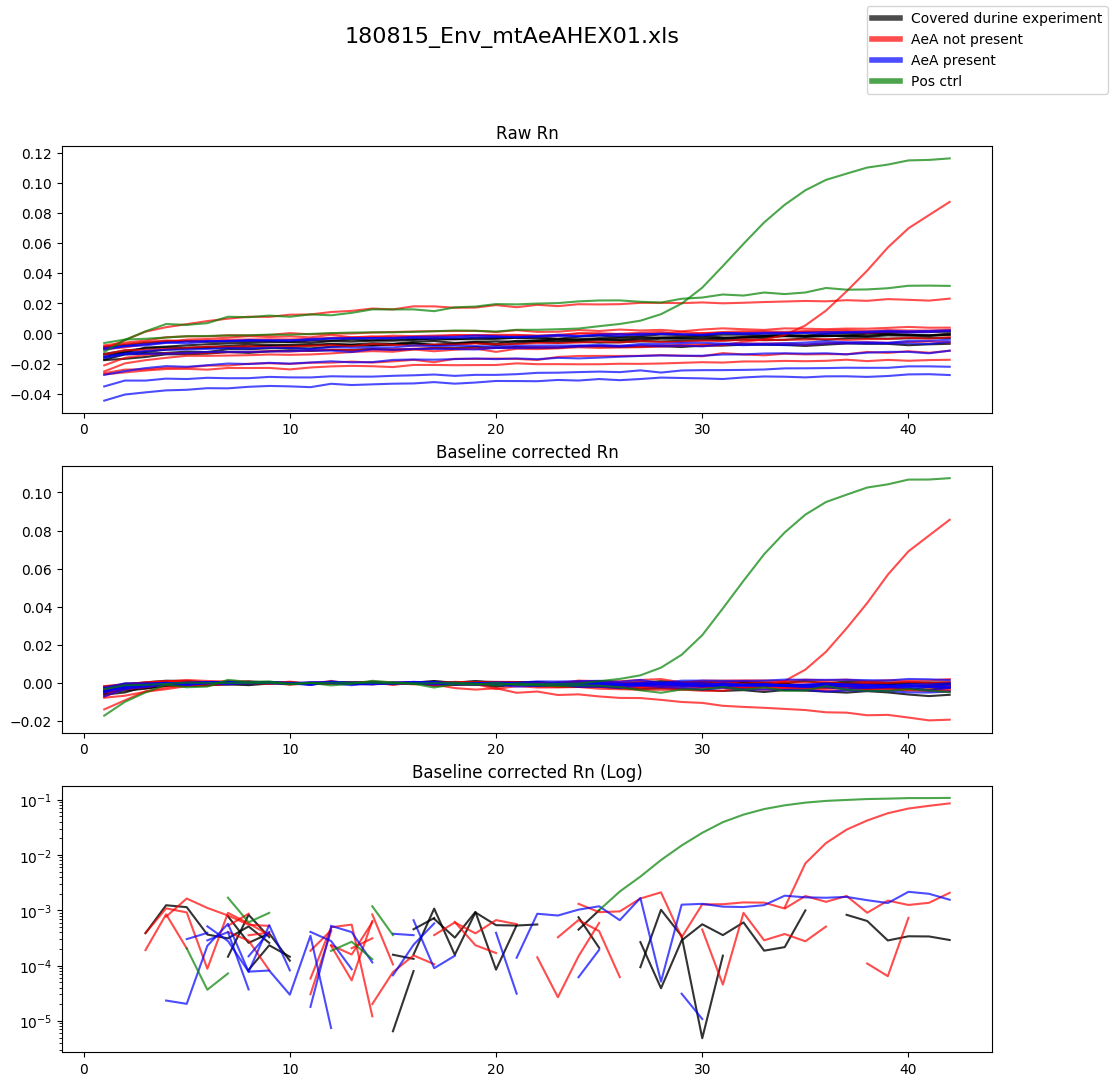

In [8]:
NTCsT1 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'Target 1')]
UsT1 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'Target 1')]
SsT1 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'Target 1')]

#### change these numbers to choose the interval for the baseline correction
startBase = 8
stopBase = 16
baselineCyc = np.arange(startBase,stopBase,1)

fig=plt.figure(figsize=(12, 12), dpi=100)
plt.suptitle(D, fontsize=16)
    
#### target 1

allNTCT1wN = pd.Series()
    
for i in NTCsT1.iteritems():
#     print(i[1])
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 1')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.8)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.8)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.8)
#     plt.ylim((0.0001,15))
    allNTCT1wN = allNTCT1wN.append(wN)

thresholdT1 = 0 * allNTCT1wN.max()
print('th T1 = '+ str(thresholdT1))

xI = np.linspace(1, cycles.max(), 100)
    
numPos = 0
numNeg = 0
posWellsZ = []


for i in UsT1.iteritems():
    if i[1] not in ('Z1'): #('E1','E2','E3','E4','E5','E6','E7','E8'):
        print(i[1])
        w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 1')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        if i[1] in ('A1','A2','A3','A4','A5','A6','A7','A8', 'A9'):
            f = interpolate.interp1d(cycles, wN)
            wNI = f(xI)
            posI = np.where(wNI > thresholdT1)
            Ct = xI[posI[0][0]]
#             print(str(i[1])+' + Target 2 RNA, Ct = ' + str(str(Ct)[:6]))
            #print(str(Ct))
            numPos = numPos + 1
            posWellsZ.append(i[1])
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'r',alpha=0.7)
            plt.title('Raw Rn')
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'r',alpha=0.7)
            plt.title('Baseline corrected Rn')
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'r',alpha=0.7)
            plt.title('Baseline corrected Rn (Log)')
        if i[1] in ('C1','C2','C3','C4','C5','C6','C7'):
            numNeg = numNeg + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'b',alpha=0.7)
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'b',alpha=0.7)
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'b',alpha=0.7)
        if i[1] in ('E1','E2'):
            numNeg = numNeg + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'g',alpha=0.7)
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'g',alpha=0.7)
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'g',alpha=0.7)
        

print(numPos, ' positive wells')
print(numNeg, ' negative wells')
    


    
# for i in NTCsT1.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     plt.subplot(3,1,1)
#     plt.plot(cycles,w,'k',alpha=0.9)
#     plt.ylim((0,0.5))
#     plt.subplot(3,1,2)
#     plt.plot(cycles,wN,'k',alpha=0.9)
#     plt.ylim((-.05,0.4))
#     plt.subplot(3,1,3)
#     plt.semilogy(cycles,wN,'k',alpha=0.9)
#     plt.ylim((0.0001,0.5))
# #    allNTCT1wN = allNTCT1wN.append(wN)

### Positive controls:
# print('positive controls')
# for i in UsT1.iteritems():
#     if i[1] in ('E1', 'E2'):
#         print(i[1])
#         w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 1')]
#         fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#         baseline = fitParams[0]*cycles + fitParams[1]
#         wN = w - baseline
#         if wN.max() > thresholdT1: #and sum(i for i in wN.values if i < 0) > -0.05: #np.diff(w[1:20]).min() > -0.1:
#             f = interpolate.interp1d(cycles, wN)
#             wNI = f(xI)
#             posI = np.where(wNI > thresholdT1)
#             Ct = xI[posI[0][0]]
#             print(str(i[1])+' + Target 2 RNA, Ct = ' + str(str(Ct)[:6]))
#             #print(str(Ct))
#             #numPos = numPos + 1
#             plt.subplot(3,1,1)
#             plt.plot(cycles,w,'m',alpha=0.7)
#             plt.title('Raw Rn')
#             plt.subplot(3,1,2)
#             plt.plot(cycles,wN,'m',alpha=0.7)
#             plt.title('Baseline corrected Rn')
#             plt.subplot(3,1,3)
#             plt.semilogy(cycles,wN,'m',alpha=0.7)
#             plt.title('Baseline corrected Rn (Log)')
        
            
custom_lines = [Line2D([0], [0], color = 'k', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'r', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'b', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'g', lw=4, alpha = 0.7)]
#                 Line2D([0], [0], color = 'm', lw=4, alpha = 0.7)]

_=fig.legend(custom_lines, ['Covered durine experiment', 'AeA not present', 'AeA present', 'Pos ctrl'])

th T1 = 0.0490765472031
9 + AeA DNA, Ct = 36.111
34 + AeA DNA, Ct = 36.111
212 + AeA DNA, Ct = 37.444
225 + AeA DNA, Ct = 37.0
257 + AeA DNA, Ct = 36.555
294 + AeA DNA, Ct = 38.777
6  positive wells
362  negative wells
positive controls
ZIKV positive


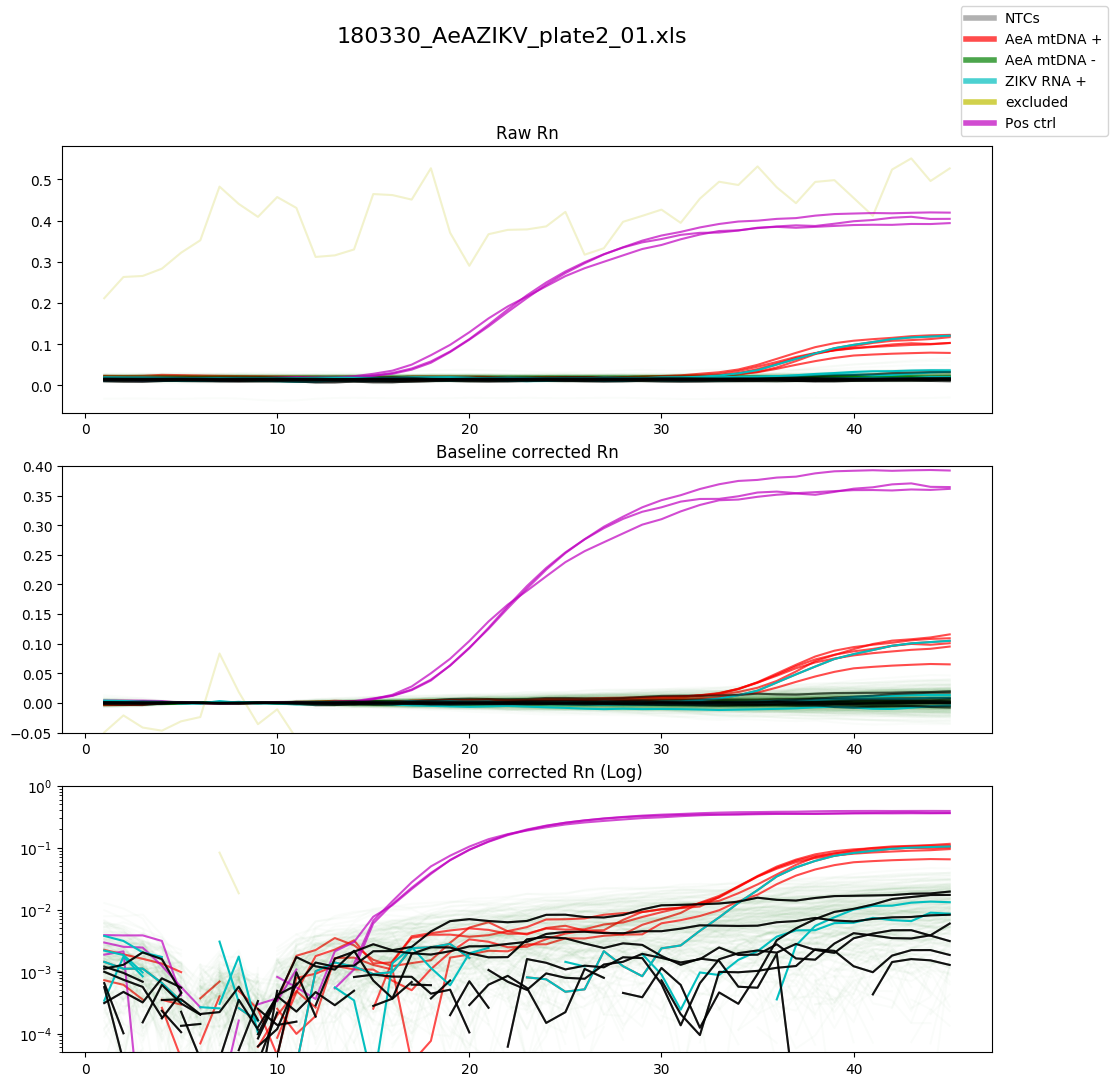

In [53]:
NTCsT1 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'AeA')]
UsT1 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'AeA')]
SsT1 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'AeA')]

startBase = 4
stopBase = 10
baselineCyc = np.arange(startBase,stopBase,1)

fig=plt.figure(figsize=(12, 12), dpi=100)
plt.suptitle(D, fontsize=16)
    
#### target 1

allNTCT1wN = pd.Series()
posWellsA = []
    
for i in NTCsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.3)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.3)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.3)
    plt.ylim((0.00005,1))
    allNTCT1wN = allNTCT1wN.append(wN)

thresholdT1 = 2.5 * allNTCT1wN.max()
print('th T1 = '+ str(thresholdT1))

xI = np.linspace(1, cycles.max(), 100)
    
numPos = 0
numNeg = 0

#or 37 or 49 or 61 or 73 or 85

for i in UsT1.iteritems():
    if i[1] not in (1, 25, 49, 73):
        #print(i[1])
        w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        if wN.max() > thresholdT1 and  sum(i for i in wN.values if i < 0) > -0.05: #np.diff(w[1:20]).min() > -0.1:
            f = interpolate.interp1d(cycles, wN)
            wNI = f(xI)
            posI = np.where(wNI > thresholdT1)
            Ct = xI[posI[0][0]]
            print(str(i[1])+' + AeA DNA, Ct = ' + str(str(Ct)[:6]))
            #print(str(Ct))
            numPos = numPos + 1
            posWellsA.append(i[1])
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'r',alpha=0.7)
            plt.title('Raw Rn')
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'r',alpha=0.7)
            plt.title('Baseline corrected Rn')
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'r',alpha=0.7)
            plt.title('Baseline corrected Rn (Log)')
        if wN.max() > thresholdT1 and  sum(i for i in wN.values if i < 0) < -0.05:
            numNeg = numNeg + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'y',alpha=0.2)
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'y',alpha=0.2)
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'y',alpha=0.2)
        if wN.max() < thresholdT1:
            numNeg = numNeg + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'g',alpha=0.02)
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'g',alpha=0.02)
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'g',alpha=0.02)
        

print(numPos, ' positive wells')
print(numNeg, ' negative wells')
    
for i in SsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'m',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')

    


### Positive controls:
print('positive controls')
for i in UsT1.iteritems():
    if i[1] in (25, 49, 73, 361):
        #print(i[1])
        w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        #if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
#             Ct = xI[posI[0][0]]
#             print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
        #print(str(Ct))
        #numPos = numPos + 1
        plt.subplot(3,1,1)
        plt.plot(cycles,w,'m',alpha=0.7)
        plt.title('Raw Rn')
        plt.subplot(3,1,2)
        plt.plot(cycles,wN,'m',alpha=0.7)
        plt.title('Baseline corrected Rn')
        plt.subplot(3,1,3)
        plt.semilogy(cycles,wN,'m',alpha=0.7)
        plt.title('Baseline corrected Rn (Log)')
            
### ZIKV positive:
print('ZIKV positive')
for i in UsT1.iteritems():
    if i[1] in posWellsZ:
        #print(i[1])
        w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
#             Ct = xI[posI[0][0]]
#             print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
        #print(str(Ct))
        #numPos = numPos + 1
        plt.subplot(3,1,1)
        plt.plot(cycles,w,'c',alpha=0.99)
        plt.title('Raw Rn')
        plt.subplot(3,1,2)
        plt.plot(cycles,wN,'c',alpha=0.99)
        plt.title('Baseline corrected Rn')
        plt.subplot(3,1,3)
        plt.semilogy(cycles,wN,'c',alpha=0.99)
        plt.title('Baseline corrected Rn (Log)')

for i in NTCsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.5)
    #plt.ylim((0.1,0.5))
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.5)
    plt.ylim((-.05,0.4))
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.9)
    #plt.ylim((0.0001,0.5))
#    allNTCT1wN = allNTCT1wN.append(wN)            
            
custom_lines = [Line2D([0], [0], color = 'k', lw=4, alpha = 0.3),
                Line2D([0], [0], color = 'r', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'g', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'c', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'y', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'm', lw=4, alpha = 0.7)]

_=fig.legend(custom_lines, ['NTCs', 'AeA mtDNA +', 'AeA mtDNA -','ZIKV RNA +','excluded', 'Pos ctrl'])

In [ ]:
NTCsT1

In [41]:
CoorS1 = np.load('coordinatesAll180330_ZIKVplate2_01.npy')
headShotRes= pims.ImageSequence('*.jpg', as_grey=True)

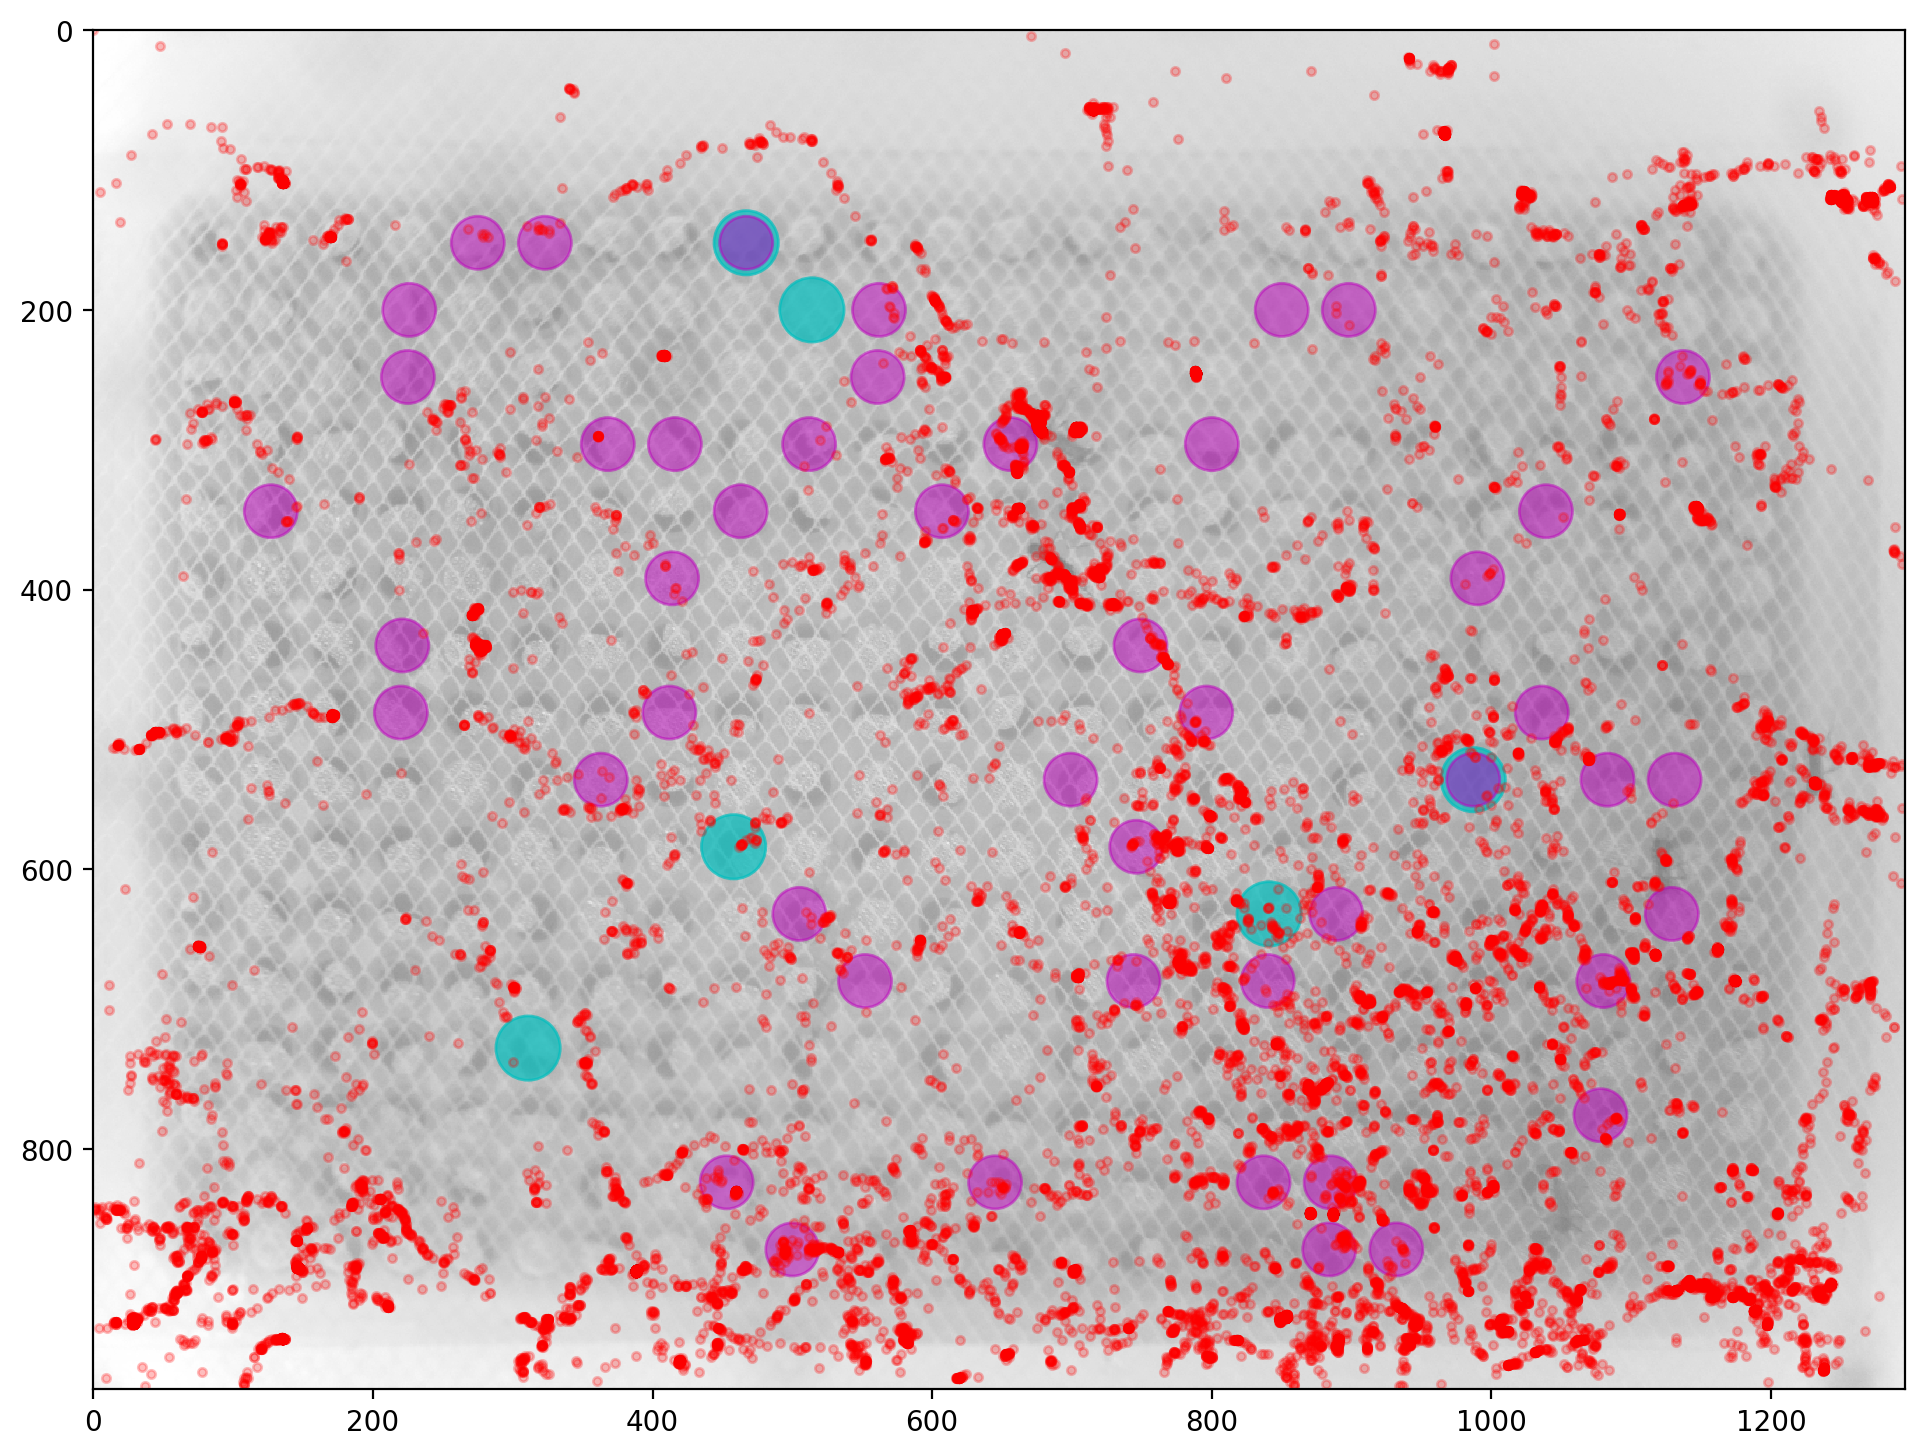

In [55]:
x_topleft = 152
y_topleft = 83
pitch = 48
x_tilt = np.floor(-1 / 23)
y_tilt = np.floor(1 / 15)
num_rows = 16
num_columns = 24
radius = 21
wells = np.zeros((972,1296,3), dtype=np.double)

#fig = plt.figure(figsize=(12, 9), dpi=100)
fig,ax = plt.subplots(1, figsize=(12, 9), dpi=200)
ax.set_aspect('equal')
ax.imshow(headShotRes[0], cmap='gray', alpha = 0.5)

for i in posWellsA:
#     w = str(i)
#     row = int(w[1:3]) - 1
#     col = ord(w[0]) - 65
    row = np.floor_divide(i-1,num_columns)
#     print(row)
    col = (i - (row) * 24) -1
#     print(col)
    x = x_topleft + row * pitch + col * y_tilt
    x = int(x)
    y = y_topleft + col * pitch + row * x_tilt
    y = int(y)
    #cc = Circle(y, x, radius, wells.shape)
    cc = Circle((y, x), radius + 2, color='c', alpha = 0.7)
    ax.add_patch(cc)
    #wells[cc] = 1

for i in posWellsZ:
#     w = str(i)
#     row = int(w[1:3]) - 1
#     col = ord(w[0]) - 65
    row = np.floor_divide(i-1,num_columns)
#     print(row)
    col = (i - (row) * 24) -1
#     print(col)
    x = x_topleft + row * pitch + col * y_tilt
    x = int(x)
    y = y_topleft + col * pitch + row * x_tilt
    y = int(y)
    #cc = Circle(y, x, radius, wells.shape)
    cc = Circle((y, x), radius - 2, color='m', alpha = 0.5)
    ax.add_patch(cc)
    #wells[cc] = 1
    

    
plt.plot(CoorS1[:,1], CoorS1[:,0], '.r', alpha = 0.25)
well_labels = label(wells)

In [ ]:
fig=plt.figure(figsize=(8, 10), dpi=100)


wA = d["Rn"][(d["Well"] == 231) & (d["Target Name"] == 'AeA')]
fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], wA.values[baselineCyc])
baseline = fitParams[0]*cycles + fitParams[1]
wN = wA - baseline
f = interpolate.interp1d(cycles, wN)
wNI = f(xI)
posI = np.where(wNI > thresholdT1)
plt.subplot(3,1,1)
plt.plot(cycles,wA,'c',alpha=0.99)
plt.title('Raw Rn')
plt.subplot(3,1,2)
plt.plot(cycles,wN,'c',alpha=0.99)
plt.title('Baseline corrected Rn')
plt.subplot(3,1,3)
plt.semilogy(cycles,wN,'c',alpha=0.99)
plt.title('Baseline corrected Rn (Log)')

wZ = d["Rn"][(d["Well"] == 231) & (d["Target Name"] == 'ZIKV')]
fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], wZ.values[baselineCyc])
baseline = fitParams[0]*cycles + fitParams[1]
wN = wZ - baseline
f = interpolate.interp1d(cycles, wN)
wNI = f(xI)
posI = np.where(wNI > thresholdT1)
plt.subplot(3,1,1)
plt.plot(cycles,wZ,'r',alpha=0.99)
plt.title('Raw Rn')
plt.subplot(3,1,2)
plt.plot(cycles,wN,'r',alpha=0.99)
plt.title('Baseline corrected Rn')
plt.subplot(3,1,3)
plt.semilogy(cycles,wN,'r',alpha=0.99)
plt.title('Baseline corrected Rn (Log)')

In [ ]:
x_topleft = 100
y_topleft = 212
pitch = 94.5
x_tilt = np.floor(-16 / 11)
y_tilt = np.floor(4 / 7)
num_rows = 8
num_columns = 12
radius = 36
wells = np.zeros((972,1296,3), dtype=np.double)

#fig = plt.figure(figsize=(12, 9), dpi=100)
fig,ax = plt.subplots(1, figsize=(12, 9), dpi=100)
ax.set_aspect('equal')
ax.imshow(headShotRes[0], cmap='gray')

for i in posWells:
    w = str(i)
    row = int(w[1:3]) - 1
    col = ord(w[0]) - 65
    x = x_topleft + row * pitch + col * y_tilt
    x = int(x)
    y = y_topleft + col * pitch + row * x_tilt
    y = int(y)
    #cc = Circle(y, x, radius, wells.shape)
    cc = Circle((x, y), radius,color='k', alpha = 0.4)
    ax.add_patch(cc)
    #wells[cc] = 1
    
plt.plot(CoorS1[:,1], CoorS1[:,0], '.r', alpha = 0.3)
well_labels = label(wells)

In [ ]:
fig=plt.figure(figsize=(8, 10), dpi=100)


wA = d["Rn"][(d["Well"] == 361) & (d["Target Name"] == 'AeA')]
fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], wA.values[baselineCyc])
baseline = fitParams[0]*cycles + fitParams[1]
wN = wA - baseline
f = interpolate.interp1d(cycles, wN)
wNI = f(xI)
posI = np.where(wNI > thresholdT1)
plt.subplot(3,1,1)
plt.plot(cycles,wA,'c',alpha=0.99)
plt.title('Raw Rn')
plt.subplot(3,1,2)
plt.plot(cycles,wN,'c',alpha=0.99)
plt.title('Baseline corrected Rn')
plt.subplot(3,1,3)
plt.semilogy(cycles,wN,'c',alpha=0.99)
plt.title('Baseline corrected Rn (Log)')

wZ = d["Rn"][(d["Well"] == 361) & (d["Target Name"] == 'ZIKV')]
fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], wZ.values[baselineCyc])
baseline = fitParams[0]*cycles + fitParams[1]
wN = wZ - baseline
f = interpolate.interp1d(cycles, wN)
wNI = f(xI)
posI = np.where(wNI > thresholdT1)
plt.subplot(3,1,1)
plt.plot(cycles,wZ,'r',alpha=0.99)
plt.title('Raw Rn')
plt.subplot(3,1,2)
plt.plot(cycles,wN,'r',alpha=0.99)
plt.title('Baseline corrected Rn')
plt.subplot(3,1,3)
plt.semilogy(cycles,wN,'r',alpha=0.99)
plt.title('Baseline corrected Rn (Log)')

In [ ]:
fig=plt.figure(figsize=(8, 17), dpi=100)

startBase = 4
stopBase = 25
baselineCyc = np.arange(startBase,stopBase,1)

for i in posWellsZ:
    #print(i)
    wA = d["Rn"][(d["Well"] == i) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], wA.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = wA - baseline
    f = interpolate.interp1d(cycles, wN)
    wNI = f(xI)
    posI = np.where(wNI > thresholdT1)
    plt.subplot(3,1,1)
    plt.plot(cycles,wA,'c',alpha=0.8)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'c',alpha=0.8)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'c',alpha=0.8)
    plt.title('Baseline corrected Rn (Log)')

    wZ = d["Rn"][(d["Well"] == i) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], wZ.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = wZ - baseline
    f = interpolate.interp1d(cycles, wN)
    wNI = f(xI)
    posI = np.where(wNI > thresholdT1)
    plt.subplot(3,1,1)
    plt.plot(cycles,wZ,'r',alpha=0.4)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'r',alpha=0.4)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'r',alpha=0.4)
    plt.title('Baseline corrected Rn (Log)')
    plt.ylim((0.0001,0.5))

In [ ]:
NTCsT1 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'AeA')]
UsT1 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'AeA')]
SsT1 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'AeA')]

startBase = 3
stopBase = 18
baselineCyc = np.arange(startBase,stopBase,1)

fig=plt.figure(figsize=(12, 12), dpi=100)
plt.suptitle(D, fontsize=16)
    
#### target 1

allNTCT1wN = pd.Series()
    
for i in NTCsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.3)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.3)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.3)
    plt.ylim((0.0001,15))
    allNTCT1wN = allNTCT1wN.append(wN)

thresholdT1 = 4 * allNTCT1wN.max()
print('th T1 = '+ str(thresholdT1))

xI = np.linspace(1, cycles.max(), 100)
    
numPos = 0
numNeg = 0

#or 37 or 49 or 61 or 73 or 85

for i in UsT1.iteritems():
    if i[1] not in (1, 12, 24, 36, 48, 25, 37, 49, 61, 73, 85):
        #print(i[1])
        w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        if wN.max() > thresholdT1 and np.diff(w[1:20]).min() > -0.1:
            f = interpolate.interp1d(cycles, wN)
            wNI = f(xI)
            posI = np.where(wNI > thresholdT1)
            Ct = xI[posI[0][0]]
            print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
            #print(str(Ct))
            numPos = numPos + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'r',alpha=0.7)
            plt.title('Raw Rn')
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'r',alpha=0.7)
            plt.title('Baseline corrected Rn')
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'r',alpha=0.7)
            plt.title('Baseline corrected Rn (Log)')
        if wN.max() < thresholdT1:
            numNeg = numNeg + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'g',alpha=0.2)
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'g',alpha=0.2)
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'g',alpha=0.2)
        

print(numPos, ' positive wells')
print(numNeg, ' negative wells')
    
for i in SsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'m',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')

    
for i in NTCsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.1)
    #plt.ylim((-.1,0.3))
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.1)
    plt.ylim((-.05,0.05))
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.9)
    plt.ylim((0.00001,0.5))
#    allNTCT1wN = allNTCT1wN.append(wN)

### Positives:
for i in UsT1.iteritems():
    if i[1] in (1, 48, 24, 36):
        #print(i[1])
        w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        if wN.max() > thresholdT1 and np.diff(w[1:20]).min() > -0.1:
            f = interpolate.interp1d(cycles, wN)
            wNI = f(xI)
            posI = np.where(wNI > thresholdT1)
            Ct = xI[posI[0][0]]
            print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
            print(str(Ct))
            #numPos = numPos + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'m',alpha=0.1)
            plt.title('Raw Rn')
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'m',alpha=0.1)
            plt.title('Baseline corrected Rn')
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'m',alpha=0.1)
            plt.title('Baseline corrected Rn (Log)')

for i in UsT1.iteritems():
    if i[1] in (46, 68, 81):
        #print(i[1])
        w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
#         Ct = xI[posI[0][0]]
#         print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
#         print(str(Ct))
        #numPos = numPos + 1
        plt.subplot(3,1,1)
        plt.plot(cycles,w,'b',alpha=0.7)
        plt.title('Delta Rn')
        plt.subplot(3,1,2)
        plt.plot(cycles,wN,'b',alpha=0.7)
        plt.title('Baseline corrected Rn')
        plt.subplot(3,1,3)
        plt.semilogy(cycles,wN,'b',alpha=0.7)
        plt.title('Baseline corrected Rn (Log)')
            
custom_lines = [Line2D([0], [0], color = 'k', lw=4, alpha = 0.3),
                Line2D([0], [0], color = 'r', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'g', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'b', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'm', lw=4, alpha = 0.7)]

_=fig.legend(custom_lines, ['NTCs', 'AeA mtDNA +', 'AeA mtDNA -', 'ZIKV RNA +', 'Pos ctrl'])

In [ ]:
NTCsT1 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'ZIKV')]
UsT1 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'ZIKV')]
SsT1 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'ZIKV')]

# NTCsT2 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'Target 2')]
# UsT2 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'Target 2')]
# SsT2 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'Target 2')]

baselineCyc = np.arange(startBase,stopBase,1)

fig=plt.figure(figsize=(12, 12), dpi=100)
plt.suptitle(D, fontsize=16)
    
#### target 1

allNTCT1wN = pd.Series()
    
for i in NTCsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.3)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.3)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.3)
    plt.ylim((0.0001,15))
    allNTCT1wN = allNTCT1wN.append(wN)

thresholdT1 = 1.5 * allNTCT1wN.max()
print('th T1 = '+ str(thresholdT1))

xI = np.linspace(1, cycles.max(), 100)
    
# for i in UsT1.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     if wN.max() > thresholdT1:
#         f = interpolate.interp1d(cycles, wN)
#         wNI = f(xI)
#         posI = np.where(wNI > thresholdT1)
#         #Ct = xI[posI[0][0]]
#         #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
#     plt.subplot(3,1,1)
#     plt.plot(cycles,w,'r',alpha=0.2)
#     plt.title('Raw Rn')
#     plt.subplot(3,1,2)
#     plt.plot(cycles,wN,'r',alpha=0.2)
#     plt.title('Baseline corrected Rn')
#     plt.subplot(3,1,3)
#     plt.semilogy(cycles,wN,'r',alpha=0.7)
#     plt.title('Baseline corrected Rn (Log)')

for i in SsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        #Ct = xI[posI[0][0]]
        #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'m',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')

    
for i in NTCsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.9)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.9)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.9)
    plt.ylim((0.0001,15))
#    allNTCT1wN = allNTCT1wN.append(wN)
    
#### target 2

# allNTCT2wN = pd.Series()

# for i in NTCsT2.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     plt.subplot(3,2,2)
#     plt.plot(cycles,w,'k',alpha=0.3)
#     plt.subplot(3,2,4)
#     plt.plot(cycles,wN,'k',alpha=0.3)
#     plt.subplot(3,2,6)
#     plt.semilogy(cycles,wN,'k',alpha=0.3)
#     plt.ylim((0.0001,0.2))
#     allNTCT2wN = allNTCT2wN.append(wN)

# thresholdT2 = 10 * allNTCT2wN.max()
    
# for i in UsT2.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     if wN.max() > thresholdT2:
#         f = interpolate.interp1d(cycles, wN)
#         wNI = f(xI)
#         posI = np.where(wNI > thresholdT2)
#         Ct = xI[posI[0][0]]
#         print(i[1]+' + AeA mtDNA, Ct = ' + str(str(Ct)[:6]))
#     plt.subplot(3,2,2)
#     plt.plot(cycles,w,'g',alpha=0.7)
#     plt.title('Raw Rn')
#     plt.subplot(3,2,4)
#     plt.plot(cycles,wN,'g',alpha=0.7)
#     plt.title('Baseline corrected Rn')
#     plt.subplot(3,2,6)
#     plt.semilogy(cycles,wN,'g',alpha=0.7)
#     plt.title('Baseline corrected Rn (Log)')
    
# for i in SsT2.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     if wN.max() > thresholdT2:
#         f = interpolate.interp1d(cycles, wN)
#         wNI = f(xI)
#         posI = np.where(wNI > thresholdT2)
#         Ct = xI[posI[0][0]]
#         print(i[1]+' + AeA mtDNA, Ct = ' + str(str(Ct)[:6]))
#     plt.subplot(3,2,2)
#     plt.plot(cycles,w,'m',alpha=0.7)
#     plt.title('Raw Rn')
#     plt.subplot(3,2,4)
#     plt.plot(cycles,wN,'m',alpha=0.7)
#     plt.title('Baseline corrected Rn')
#     plt.subplot(3,2,6)
#     plt.semilogy(cycles,wN,'m',alpha=0.7)
#     plt.title('Baseline corrected Rn (Log)')
    
custom_lines = [Line2D([0], [0], color = 'k', lw=4, alpha = 0.3),
                Line2D([0], [0], color = 'r', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'g', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'm', lw=4, alpha = 0.7)]

_=fig.legend(custom_lines, ['NTCs', 'ZIKV RNA', 'AeA mtDNA', 'STDs'])

In [ ]:
i[1]

In [ ]:
allNTCT1wN

In [ ]:
baselineCyc = np.arange(startBase,stopBase,1)

fig=plt.figure(figsize=(12, 12), dpi=100)
plt.suptitle(D, fontsize=16)
    
#### target 1

allNTCT1wN = pd.Series()
STDData = pd.DataFrame(columns = ['well', 'quantity', 'Ct'])

    
for i in NTCsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 1')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.3)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.3)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.3)
    plt.ylim((0.0001,0.7))
    allNTCT1wN = allNTCT1wN.append(wN)

thresholdT1 = 1.5 * allNTCT1wN.max()
print('th T1 = '+ str(thresholdT1))

xI = np.linspace(1, cycles.max(), 100)
    
for i in UsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 1')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'r',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'r',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'r',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')

for i in SsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 1')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
        Q = float(s["Quantity"][(s["Well"] == i[1]) & (s["Target Name"] == 'Target 1')])
        STDData = STDData.append({"well": i[1], "quantity": Q, "Ct": Ct}, ignore_index=True)
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'m',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')


    
custom_lines = [Line2D([0], [0], color = 'k', lw=4, alpha = 0.3),
                Line2D([0], [0], color = 'r', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'g', lw=4, alpha = 0.7)]

_=fig.legend(custom_lines, ['Negative Control', 'ZIKV RNA', 'AeA mtDNA'])

In [ ]:
NTCsT1 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'ZIKV')]
UsT1 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'ZIKV')]
SsT1 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'ZIKV')]

# NTCsT2 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'Target 2')]
# UsT2 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'Target 2')]
# SsT2 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'Target 2')]

baselineCyc = np.arange(startBase,stopBase,1)

fig=plt.figure(figsize=(12, 12), dpi=100)
plt.suptitle(D, fontsize=16)
    
#### target 1

allNTCT1wN = pd.Series()
    
for i in NTCsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.3)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.3)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.3)
    plt.ylim((0.0001,15))
    allNTCT1wN = allNTCT1wN.append(wN)

thresholdT1 = 1.5 * allNTCT1wN.max()
print('th T1 = '+ str(thresholdT1))

xI = np.linspace(1, cycles.max(), 100)
    
numPos = 0
numNeg = 0
    
for i in UsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
        #print(str(Ct))
        numPos = numPos + 1
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'r',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'r',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'r',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')
    if wN.max() < thresholdT1:
        numNeg = numNeg + 1
        

print(numPos, ' positive wells')
print(numNeg, ' positive wells')
    
for i in SsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'m',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')

    
for i in NTCsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.9)
    plt.ylim((0,0.5))
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.9)
    plt.ylim((0,0.5))
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.9)
    plt.ylim((0.0001,15))
#    allNTCT1wN = allNTCT1wN.append(wN)
    
#### target 2

# allNTCT2wN = pd.Series()

# for i in NTCsT2.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     plt.subplot(3,2,2)
#     plt.plot(cycles,w,'k',alpha=0.3)
#     plt.subplot(3,2,4)
#     plt.plot(cycles,wN,'k',alpha=0.3)
#     plt.subplot(3,2,6)
#     plt.semilogy(cycles,wN,'k',alpha=0.3)
#     plt.ylim((0.0001,0.2))
#     allNTCT2wN = allNTCT2wN.append(wN)

# thresholdT2 = 10 * allNTCT2wN.max()
    
# for i in UsT2.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     if wN.max() > thresholdT2:
#         f = interpolate.interp1d(cycles, wN)
#         wNI = f(xI)
#         posI = np.where(wNI > thresholdT2)
#         Ct = xI[posI[0][0]]
#         print(i[1]+' + AeA mtDNA, Ct = ' + str(str(Ct)[:6]))
#     plt.subplot(3,2,2)
#     plt.plot(cycles,w,'g',alpha=0.7)
#     plt.title('Raw Rn')
#     plt.subplot(3,2,4)
#     plt.plot(cycles,wN,'g',alpha=0.7)
#     plt.title('Baseline corrected Rn')
#     plt.subplot(3,2,6)
#     plt.semilogy(cycles,wN,'g',alpha=0.7)
#     plt.title('Baseline corrected Rn (Log)')
    
# for i in SsT2.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     if wN.max() > thresholdT2:
#         f = interpolate.interp1d(cycles, wN)
#         wNI = f(xI)
#         posI = np.where(wNI > thresholdT2)
#         Ct = xI[posI[0][0]]
#         print(i[1]+' + AeA mtDNA, Ct = ' + str(str(Ct)[:6]))
#     plt.subplot(3,2,2)
#     plt.plot(cycles,w,'m',alpha=0.7)
#     plt.title('Raw Rn')
#     plt.subplot(3,2,4)
#     plt.plot(cycles,wN,'m',alpha=0.7)
#     plt.title('Baseline corrected Rn')
#     plt.subplot(3,2,6)
#     plt.semilogy(cycles,wN,'m',alpha=0.7)
#     plt.title('Baseline corrected Rn (Log)')
    
custom_lines = [Line2D([0], [0], color = 'k', lw=4, alpha = 0.3),
                Line2D([0], [0], color = 'r', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'g', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'm', lw=4, alpha = 0.7)]

_=fig.legend(custom_lines, ['NTCs', 'ZIKV RNA', 'AeA mtDNA', 'STDs'])

In [ ]:
STDData

In [ ]:
fitP, fitC = curve_fit(fitFunc, np.log10(STDData.quantity), STDData.Ct)
plt.plot(np.log10(STDData.quantity), STDData.Ct,'.r')
plt.plot(np.log10(STDData.quantity), fitP[0] * np.array(np.log10(STDData.quantity)) + fitP[1])

In [ ]:
efficiency = 10**(-1/fitP[0])-1
print('efficiency = ' + str(efficiency))